<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/GRAD_CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
K.clear_session()

# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet')

553467096/553467096 [==============================] - 4s 0us/step


In [ ]:
!wget https://s3.amazonaws.com/book.keras.io/img/ch5/creative_commons_elephant.jpg

--2023-09-08 19:16:47--  https://s3.amazonaws.com/book.keras.io/img/ch5/creative_commons_elephant.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.32.46, 52.217.225.192, 52.217.224.88, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.32.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190269 (186K) [image/jpeg]
Saving to: ‘creative_commons_elephant.jpg’

creative_commons_el 100%[===================>] 185.81K  1020KB/s    in 0.2s    

2023-09-08 19:16:47 (1020 KB/s) - ‘creative_commons_elephant.jpg’ saved [190269/190269]



In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [ ]:
img_path = 'creative_commons_elephant.jpg'
img=cv2.imread(img_path)
x=cv2.resize(img,(224,224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds=model.predict(x)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
decode_predictions(preds,top=2)[0]

35363/35363 [==============================] - 0s 0us/step


[('n02504458', 'African_elephant', 0.57328516),
 ('n01871265', 'tusker', 0.3721029)]

In [ ]:
np.argmax(preds[0])

386

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
African_elephant=model.output[:,386]

In [ ]:
last_layer=model.get_layer('block5_conv3').output

In [ ]:
grads=K.gradients(African_elephant,last_layer)[0]

In [ ]:
pooled_grads = K.mean(grads,axis=(0,1,2))

In [ ]:
iterator=K.function([model.input],[pooled_grads,last_layer[0]])

In [ ]:
pooled_grads_value, conv_layer_output_value = iterator([x])


In [ ]:
conv_layer_output_value.shape

(14, 14, 512)

In [ ]:
conv_layer_output_value.shape

(14, 14, 512)

In [ ]:
pooled_grads_value.shape

(512,)

In [ ]:
for i in range(512):
  conv_layer_output_value[:,:,i]*=pooled_grads_value[i]



In [ ]:
heatmap=np.mean(conv_layer_output_value,axis=-1)

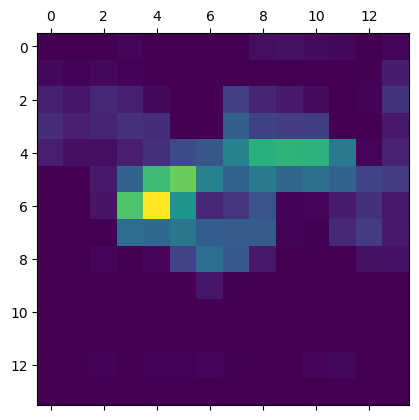

In [ ]:
import matplotlib.pyplot as plt
heatmap=np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [ ]:
import cv2

# We use cv2 to load the original image
img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap *.3 + img

# Save the image to disk


In [ ]:
cv2.imwrite('elephant_cam.jpg', superimposed_img)

True

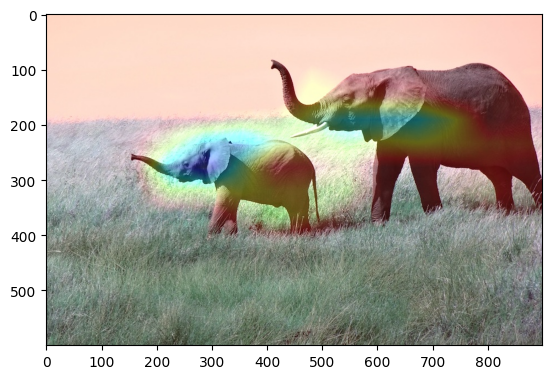

In [ ]:
plt.imshow(cv2.imread('/content/elephant_cam.jpg'))

In [ ]:
model=VGG16(weights='imagenet')

In [ ]:
!wget https://s3.amazonaws.com/book.keras.io/img/ch5/creative_commons_elephant.jpg

--2023-09-08 20:39:55--  https://s3.amazonaws.com/book.keras.io/img/ch5/creative_commons_elephant.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.131.16, 52.217.94.254, 52.216.58.136, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.131.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190269 (186K) [image/jpeg]
Saving to: ‘creative_commons_elephant.jpg.3’

creative_commons_el 100%[===================>] 185.81K  1013KB/s    in 0.2s    

2023-09-08 20:39:55 (1013 KB/s) - ‘creative_commons_elephant.jpg.3’ saved [190269/190269]



In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
img=cv2.imread("/content/creative_commons_elephant.jpg.3")

In [ ]:
img=cv2.resize(img,(224,224))

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
img=np.expand_dims(img,axis=0)

In [ ]:
img=tf.keras.applications.vgg16.preprocess_input(img)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
preds=model.predict(img)

In [ ]:
tf.keras.applications.vgg16.decode_predictions(preds,top=4)

[[('n02504458', 'African_elephant', 0.57328516),
  ('n01871265', 'tusker', 0.3721029),
  ('n02504013', 'Indian_elephant', 0.045069713),
  ('n02408429', 'water_buffalo', 0.009402669)]]

In [ ]:
np.argmax(preds)

386

In [ ]:
model_output=model.output[:,386]

In [ ]:
layer=model.get_layer('block5_conv3').output

In [ ]:
grads=K.gradients(model_output,layer)[0]

In [ ]:
pooled_grads=K.mean(grads,axis=(0,1,2))

In [ ]:
iterate=K.function([model.input],[pooled_grads,layer[0]])

In [ ]:
coffics,kernals=iterate([img])

In [ ]:
coffics.shape[0]

512

In [ ]:
for i in range(coffics.shape[0]):
  kernals[:,:,i]*=coffics[i]

heatmap=np.mean(kernals,axis=-1)

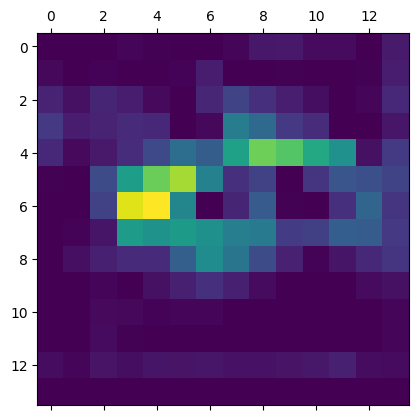

In [ ]:
heatmap=np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
plt.matshow(heatmap)

In [ ]:
import cv2

# We use cv2 to load the original image
img = cv2.imread("/content/creative_commons_elephant.jpg.1")

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img

# Save the image to disk
cv2.imwrite('elephant_camSDSD.jpg', superimposed_img)

True

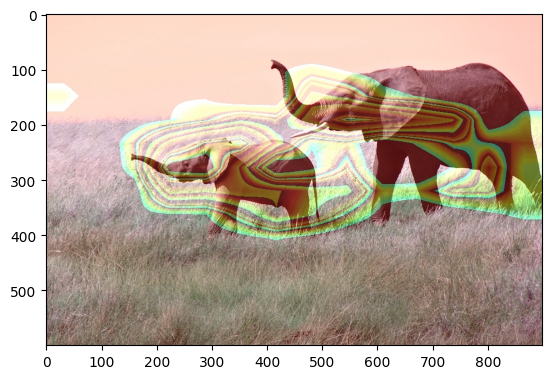

In [ ]:
plt.imshow(cv2.imread('/content/elephant_camSDSD.jpg'))